<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/Arb%C3%B3l%20de%20decisi%C3%B3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARBOLES DE DECISION DEL
 FICHERO TITANIC_TRAIN.CSV

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, recall_score, f1_score,precision_score
from pandas import DataFrame

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

def evaluate_result(y_pred, y, y_prep_pred, y_prep, metric):
    print(metric.__name__, "SIN preparacion:", metric(y_pred, y, average='weighted'))
    print(metric.__name__, "CON preparacion:", metric(y_prep_pred, y_prep, average='weighted'))

In [3]:
from google.colab import files

file = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [4]:
titanic = pd.read_csv("titanic_train.csv")

Copiamos y transformamos a un salida numérica

In [5]:
X = titanic.copy()
X['Pclass'] = X['Pclass'].factorize()[0]

Dividimos el conjunto de datos

In [12]:
train_set, val_set, test_set = train_val_test_split(X)

Eliminamos los 3 conjuntos de datos

In [13]:
X_train, y_train = remove_labels(train_set, 'Pclass')
X_val, y_val = remove_labels(val_set, 'Pclass')
X_test, y_test = remove_labels(test_set, 'Pclass')

In [8]:
X_train.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
787,788,0,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
74,75,1,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
113,114,0,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
635,636,1,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,NaN,S


Borramos variables de categoría

In [29]:
X_train=X_train.drop(columns=["Name","Sex","Ticket","Cabin", "Embarked"])
X_val = X_val.drop(columns=["Name","Sex","Ticket","Cabin", "Embarked"])
X_test = X_test.drop(columns=["Name","Sex","Ticket","Cabin", "Embarked"])

In [30]:
X_train

,PassengerId,Survived,Age,SibSp,Parch,Fare
570,571,1,62.0,0,0,10.5000
787,788,0,8.0,4,1,29.1250
74,75,1,32.0,0,0,56.4958
113,114,0,20.0,1,0,9.8250
635,636,1,28.0,0,0,13.0000
...,...,...,...,...,...,...
106,107,1,21.0,0,0,7.6500
270,271,0,NaN,0,0,31.0000
860,861,0,41.0,2,0,14.1083
435,436,1,14.0,1,2,120.0000


Rellenamos a 0 los 3 datos que tengan valores NAN

In [31]:
X_train.fillna(0,inplace=True)

Escalamos TRES conjuntos de datos

In [32]:
scaler = RobustScaler()
X_train_scalado = scaler.fit_transform(X_train)
X_test_scalado = scaler.transform(X_test)
X_val_scalado = scaler.transform(X_val)

Transformamos a dataframe

In [34]:
X_train_scalado = pd.DataFrame(X_train_scalado, columns=X_train.columns, index=X_train.index)
X_train_scalado.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare
570,NaN,NaN,NaN,NaN,NaN,NaN
787,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN


Averiguamos la lingitud del entrenamiento

In [35]:
X_train_scalado.fillna(0,inplace=True)

In [36]:
print(f"La longitud de X_train_scalado es {len(X_train_scalado)}")
print(f"La longitud de y_train es {len(y_train)}")

La longitud de X_train_scalado es 534
La longitud de y_train es 534


In [39]:
from sklearn.tree import DecisionTreeClassifier

Entrenamos los datos sin escalarlos

In [42]:
MAX_DEPTH = 12
clf_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, random_state=42)
clf_tree.fit(X_train, y_train) #conjunto de datos sin escalar

DecisionTreeClassifier(max_depth=12, random_state=42)

Entrenamos los datos escalados

In [43]:
clf_tree_scalado = DecisionTreeClassifier(max_depth=MAX_DEPTH,random_state=42)
clf_tree_scalado.fit(X_train_scalado, y_train)

DecisionTreeClassifier(max_depth=12, random_state=42)

Predecimos el conjunto de datos

In [44]:
y_train_prediccion = clf_tree.predict(X_train)
y_train_prep_prediccion = clf_tree_scalado.predict(X_train)

Comparamos resultados

In [45]:
evaluate_result(y_train_prediccion, y_train, y_train_prep_prediccion, y_train, f1_score)

f1_score SIN preparacion: 1.0
f1_score CON preparacion: 0.722488038277512


Predecimos los datos a validar y los de validación escalados

In [46]:
y_prediccion = clf_tree.predict(X_val)
y_prep_prediccion = clf_tree_scalado.predict(X_val_scalado)
evaluate_result(y_prediccion, y_val, y_prep_prediccion, y_val, f1_score)

f1_score SIN preparacion: 0.9495905738660313
f1_score CON preparacion: 0.7101449275362319


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Reducimos los datos de entrenamiento a 2 para visualizarlo

In [47]:
X_train_reducido = X_train[['Survived','Age']]
X_train_reducido

,Survived,Age
570,1,62.0
787,0,8.0
74,1,32.0
113,0,20.0
635,1,28.0
...,...,...
106,1,21.0
270,0,0.0
860,0,41.0
435,1,14.0


Generamos el modelo con 3 remas

In [48]:
clf_tree_reducido = DecisionTreeClassifier(max_depth=3, random_state=42) #
clf_tree_reducido.fit(X_train_reducido, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Regresentamos la gráfica

In [50]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, plot_training=True, resolution=1000):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    x1, x2 = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),np.linspace(mins[1], maxs[1], resolution))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", label="0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "rs", label="1")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "w^", label="2")
    plt.axis([mins[0], maxs[0], mins[1], maxs[1]])
    plt.xlabel('PassengerId', fontsize=14)
    plt.ylabel('Survived', fontsize=14, rotation=90)
    plt.figure(figsize=(12, 6))
    plot_decision_boundary(clf_tree_reducido, X_train_reducido.values, y_train)
    plt.show()

Instalamos el graphwiz

In [40]:
 !pip install graphviz

Contruimos el árbol de desición

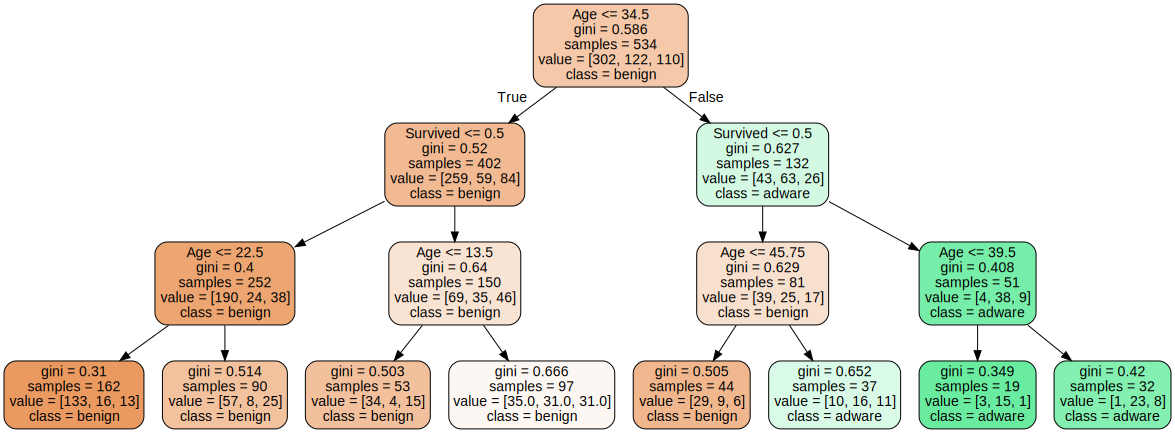

In [51]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
export_graphviz(
    clf_tree_reducido,
    out_file="Android_Malware.dot",
    feature_names=X_train_reducido.columns,
    class_names=["benign", "adware", "malware"],
    rounded=True,
    filled=True
)
Source.from_file("Android_Malware.dot")